## EEE3097S			Engineering Design: ECE		2021-10-03

## First Progress Report
## Instruction
Admin Documents

- A table showing the contribution of each of the team members
- Snapshot of your project management tool (Trello or such)
- Link to GitHub page
- Comment from your tutor stating that you have shown the working system to him. The tutor needs to check the following in the demonstration.

 - You are able to send data to your processing block
 - You are able to send data in real-time and retrieve compressed+encrypted data
 - You are able to decrypt and decompress the data and compare it with the original
-	Timeline and if your progress is on time
Data

- Discuss which data you will use and why
- From the ATPs and specifications from your previous document (Paper Design) try to justify that the data you are going to use is good enough to run all the ATPs
- Do some initial analysis of the data (like plotting its time-domain and frequency-domain waveforms) using Python or Matlab or any other tool.

Experiment Setup
- In this section, you should describe the experiments/simulations you would run. It should have three subsections:
- The first one discussing the simulations/experiments to check the overall functionality of the system.
- The next two subsections should discuss the experiments for individual blocks (compression and encryption). One of these should clearly be owned by one of the team members.
- Clearly describe the type of data each block is expected to get in and give out

Results
- In this section, you should describe the results of experiments/simulations you would run. It should have three subsections.
    -The first one discussing the results of the simulations/experiments to check the overall functionality of the system.
    -The next two subsections should discuss the results from the individual blocs (compression and encryption). One of these should clearly be owned by one of the team members.
- Try to check the change in the performance when you change the data (e.g. making it faster or under-sampling it or adding different levels of white-Gaussian noise)

ATPs
- Recreate the ATPs from your previous document
- In a table mention each ATP and mention if this has been met in your design
 - If an ATP has not been met then comment why and either change the design or change the specifications
- If you change the specifications (due to unmet ATPs) then tabulate the specifications again showing the previous version and the new version

### Data
### Used data
In validation process, a raw data from the IMU would be used to validate the design acceptance test procedure. The data will be processed from the parser (i.e. Binary Data Parser) that convert the binary data logged from the VN100 into a series of CSV files.
To meet high precision and accuracy of the results validated from the compression and encryption, the actual measurements of the parameters from the IMU sensors.

The raw data collected from an IMU gives some idea of the world around it, but that information can also be processed for additional insight. Sensor fusion is the (mathematical) art of combining the data from each sensor in an IMU to create a more complete picture of the device’s orientation and heading. For instance, while looking at gyroscope information for rotational motion, you can incorporate an accelerometers sense of gravity to create a reference frame.

### Justify that the data you are going to use is good enough to run all the ATPs

The 25% of the lower fourier transform coefficients would be preserved at 25 kHz and the maximum sampling frequency of data would be captured 12.5 kHz.  To obtain smooth sampling frequency, the minimum frequency of caputuring the data would be determined from large amount of the data (in each sensor measurands) and the number of time samples to be logged which is equivalent to frequency samples from the Discreate fourier trasnformation.
The IMU data to be processed is large enough to capture the data at a smooth sampling rate. Each measurands in the data set contains 14950 real time values.

## Do some initial analysis of the data



## Experimental Setup
## Overall functionality of the system setup
The IMU data will be distributed to multiple parts of the entire system. The data at first, is sent to both compression-and-encryption sub-sub systems and trasnformed into frequency domain by taking the amplitude of DFT at the same time. The Initial 25% of the fourier coefficients directly from the data would be compared to the final 25% fourier coeffients after decryption and decompression of the data. However, the data generation, reception and validation would be taking place outside of the devices under test. All csv files will be parsed into the compressiojn-encryption system to compress and encrypt the data and remove the original data. The rate in which the output decompressed-and-decrypted data is produced would be measured. Throughput is equivalent to the data size divide by excution time to complete compression and encryption.

The latency of the system would computed from distance in which the data is gouing to travel from one host to another divide by the rate of transimission.
The data loss would be established from the difference between the datasize of the original file and the obtained size after decryption-and-decompression.

## Compression setup
The setup for compression system involves a selection software library for data compression such as zlib which ensures files are restored to the original state. The compression algorithm encoporates the Huffman encoding deflate method which encodes the entire table of the IMU data into compressed data.
At first the program reads the data from IMU and create a dataframe of the csv files which then can be used to process the coloumn and other functions. The data size of the original data and compressed data will be measured from the system library. The execution time will be measured by importing the time library and setting up start time and end time before and after the compression program portion.
The expected result is a compressed data with 'zip' suffix at the end of the file name. 

## Encryption setup

In the encryption setup, a single key would be generated from AES symmetric encryption library which uses 128 blocks and up to 256-bit keys. The compressed csv files from the compression block would be processed as an input data in the encryption block. The algorithm will be implemeted as follows:

- We initialize the Fernet object as a local variable which contains the key
- Next, we read our original IMU data (csv file) into original
- Then we encrypt the data using the Fernet object and store it as encrypted
- And finally, we write it into a new .csv file called “enc_IMU_data.csv”

The difference between the size of the original and encrypted data would be computed.

### Results
For each data set, the execution time, data size of the original and compressed data is as follows:

    
The algorithm is compressing the data at faster rate which meet the requirement and ATP of the IP and constitute more efficiency. The algorithm provides a low compression ratio and high compression speed.
ded and encryptetd to codes.

### Acceptance Test Procedure


In [1]:
import os
#import compress #the compression module
#import encrypt #the encryption module
dir = "IMU/"
def scanForNewFiles():
    for file in os.listdir(dir):
        if (file[-3:] == "csv"):
            print(file)
            #compress(file)
            compress(file)
            #encrypt(file)
            encrypt(file)
            #wait for copression and encryption
            
            #delete file once encrypted and compressed
            
            os.remove(os.path.join(dir, file))
        else:
            print("nothing to do")
              

if __name__ == "__main__":
    try:
        while True:
            scanForNewFiles()
            pass
    except Exception as e:
        print(e)


[WinError 3] The system cannot find the path specified: 'IMU/'


In [9]:
# Create a sampled signal
import time
import sys
import os
import io
import csv
import gzip
import zipfile
import zlib
import pandas as pd

def compress(filename):
    iris=pd.read_csv(filename,header=1,skipfooter = 1, sep=r'[,, ,]+',engine='python')
    # Checking the size of the data
    oriSize=os.path.getsize(filename)
    print("\nThe size of original data is", oriSize,'bytes')


    # Compressing the data
    start = time.time()
    compressedData=iris.to_csv(filename+'.zip', index=False,compression='zip')
    end = time.time()

    print("The time of execution in a compressor is ", round(end-start,2), ' seconds')

    # Checking size of text after compression
    comSize=os.path.getsize(filename+'.zip')
    print("\nsize of compressed Data is",comSize,'bytes')

    print("\nData size deference= ", oriSize-comSize,'bytes')
    print("Compression speed (Uncompressed bits/seconds to compress)",round(oriSize/round(end-start,2)*0.000001,2),'Mbits/s')
    print("Compression ratio = ",round(oriSize/comSize,3))
    print("The compressor yield a space saving of",round((1-comSize/oriSize)*100),'%')
    print('The compressed file size is ',round((comSize/oriSize)*100),'% less than the source file')
    
    return compressedData

In [10]:
compressor = compress("2018-09-19-06_28_11_VN100.csv")


The size of original data is 9083530 bytes
The time of execution in a compressor is  5.47  seconds

size of compressed Data is 3789967 bytes

Data size deference=  5293563 bytes
Compression speed (Uncompressed bits/seconds to compress) 1.66 Mbits/s
Compression ratio =  2.397
The compressor yield a space saving of 58 %
The compressed file size is  42 % less than the source file


In [51]:
from cryptography.fernet import Fernet

def encrypt(filename):
# generate a key for encryptio and decryption
# You can use fernet to generate
# the key or use random key generator
# here I'm using fernet to generate key

    key = Fernet.generate_key()

    with open('mykey.txt', 'wb') as mykey:
        mykey.write(key)

    with open('mykey.txt', 'rb') as mykey:
        key = mykey.read()

    keySize=sys.getsizeof(key)
    print("\nThe key size is", keySize,'bytes')

    print(key)

    # Instance the Fernet class with the key

    fernet = Fernet(key)

    with open(filename+'.zip', 'rb') as comFile:
        compressedFile = comFile.read()
    oriSize=os.path.getsize(filename+'.zip')
    print("\nThe size of the compressed data is", oriSize,'bytes')

    # then use the Fernet class instance
    # to encrypt the string string must must
    # be encoded to byte string before encryption
    start = time.time()
    encryptedData=fernet.encrypt(compressedFile)
    end = time.time()
    encTime = round(end-start,2)
    print("The execution time of encrypting the compressed data is ", encTime, ' seconds')

    with open ('enc_Data.zip', 'wb') as encrypted_file:
        encrypted_file.write(encryptedData)
    encSize=os.path.getsize('enc_Data.zip')
    print("\nThe Size of the encrypted data is", encSize, 'bytes')

    print("\nData size difference between compressed and encrypted file is", encSize-oriSize,'bytes')

    print("Encryption speed (Uncompressed bits/seconds to compress)",round(oriSize/round(encTime,2)*0.000001,2),'Mbits/s')
    return encryptedData

In [52]:
encFile = encrypt("2018-09-19-06_28_11_VN100")


The key size is 77 bytes
b'_qgbUGYa8RHbE_mDlKMM60gWAZRbxMNxuTIbUe2VMLk='

The size of the compressed data is 3789959 bytes
The execution time of encrypting the compressed data is  0.09  seconds

The Size of the encrypted data is 5053368 bytes

Data size difference between compressed and encrypted file is 1263409 bytes
Encryption speed (Uncompressed bits/seconds to compress) 42.11 Mbits/s


In [53]:
# decrypt the encrypted string with the
    # Fernet instance of the key,
    # that was used for encrypting the csv file
    # encoded bytes are returned by decrypt method,
    # decode the encrpyted compressed csv data with decrypt method
def decrypt(encryptedData):
    with open('mykey.txt', 'rb') as mykey:
        key = mykey.read()
    fernet = Fernet(key)
    start = time.time()
    decryptedData = fernet.decrypt(encryptedData)
    end = time.time()
    decTime = round(end-start,2)
    print("The execution time of encrypting the compressed data is ", decTime, ' seconds')
    with open('dec_Data.zip', 'wb') as decrypted_file:
        decrypted_file.write(decryptedData)
    
    encSize=sys.getsizeof(encryptedData)
    print("\nThe Size of the encrypted data is", encSize, 'bytes')
    
    decSize=os.path.getsize('dec_Data.zip')
    print("\nData size difference between encrypted and decrypted file is", encSize-decSize,'bytes')

    print("Decryption speed (Uncompressed bits/seconds to compress)",round(encSize/round(decTime,2)*0.000001,2),'Mbits/s')
    print("\nThe size of the decrypted data is", decSize)
    return decryptedData

In [54]:
decFile = decrypt(encFile)

The execution time of encrypting the compressed data is  0.11  seconds

The Size of the encrypted data is 5053401 bytes

Data size difference between encrypted and decrypted file is 1263442 bytes
Decryption speed (Uncompressed bits/seconds to compress) 45.94 Mbits/s

The size of the decrypted data is 3789959


In [55]:
#def decompress(decryptedFile):
    
with zipfile.ZipFile('dec_Data.zip','r') as zip_ref:
    zip_ref.extractall('C:\Users\SupeRm3gA\Documents\YEAR3\Semester_2\EEE3097S\LoggerWavesInIce\Logger_GPS_SD_VN_Binary_output_Parser\dec_Data.zip')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-55-87aa69aa02c5>, line 4)

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy as sp
from scipy.fftpack import fft, ifft, fftfreq, fftshift, ifftshift

iris=pd.read_csv(r'2018-09-19-06_28_11_VN100.csv',header=1,skipfooter = 1, sep=r'[,, ,]+',engine='python')
print(iris.dtypes)
MagX = iris['MagX']
# sampling rate
fs = 100
# sampling interval
ts = 1.0/fs

t = np.arange(0,1,ts)

def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X


UTC          object
computer    float64
time        float64
MagX        float64
MagY        float64
MagZ        float64
AccX        float64
AccY        float64
AccZ        float64
GyroX       float64
GyroY       float64
GyroZ       float64
Temp        float64
Pres        float64
Yaw         float64
Pitch       float64
Roll        float64
DCM1        float64
DCM2        float64
DCM3        float64
DCM4        float64
DCM5        float64
DCM6        float64
DCM7        float64
DCM8        float64
DCM9        float64
MagNED1     float64
MagNED2     float64
MagNED3     float64
AccNED1     float64
AccNED2     float64
ACCNED3     float64
dtype: object


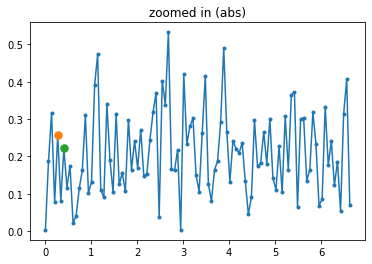

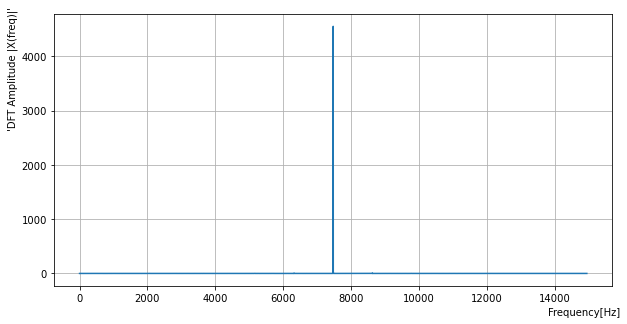

In [8]:
fs = 1000

magX = iris["MagX"]
magY = iris["MagY"]



x=magX.to_numpy()

MagX_fft = fftshift(fft(magX.to_numpy()))     # Calculate the FFT, and also shift so that f=0Hz is in the center.
timestep=1/fs
n = x.size
freq = np.fft.fftfreq(n, d=timestep)

plt.plot(freq[:100],np.abs(MagX_fft)[:100],'.-')
plt.plot(freq[4],np.abs(MagX_fft[4]),'.-',ms=15 )
plt.plot(freq[6],np.abs(MagX_fft[6]),'.-',ms=15 )
plt.title('zoomed in (abs)')

plt.figure(figsize=(10,5))
plt.plot(np.abs(MagX_fft)) # Note: the 2./N properly normalizes the FFT amplitude to be in Volts.
plt.grid(True)

plt.xlabel("Frequency[Hz]",position=(0.95,1))
plt.ylabel("'DFT Amplitude |X(freq)|'",position=(1,0.8))
plt.show()
